<a href="https://colab.research.google.com/github/roshan-shaik-ml/langchain-academy/blob/main/Lesson_3_Conditional_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langchain

In [5]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.types import Command, interrupt

In [6]:
class State(TypedDict):

    nlist: Annotated[List[str], operator.add]

In [27]:
def node_a(state: State)-> Command[Literal["b", "c", END]]: # Helps to draw the graph

    select = state["nlist"][-1]

    if select == "b":
        next_node = "b"
    elif select == "b":
        next_node = "b"
    elif select == "q":
        next_node = END
    else:
        next_node = END

    return Command(
        update = State(nlist = [select]),
        goto = next_node # can be a list or a single node and checked during runtime
    )

def node_b(state: State)->State:

    return (State(nlist = ["B"]))

def node_c(state:  State)->State:

    return (State(nlist = ["C"]))

In [28]:
def conditional_edge(state: State) -> Literal["b", "c", END]:

    select = state["nlist"][-1]

    if select == "b":
        return "b"
    elif select == "b":
        return "b"
    elif select == "q":
        return END
    else:
        return END

In [25]:
builder = StateGraph(State)

# Add Nodes
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)

# Add Edges
builder.add_edge(START, "a")
builder.add_edge("b", END)
builder.add_edge("c", END)

# builder.add_conditional_edges("a", conditional_edge)

# Compile and display
graph = builder.compile()

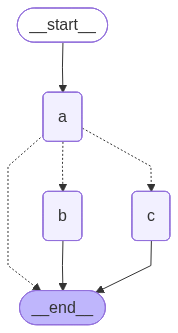

In [26]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
user = input("b, c or q to quite: ")

input_state = State(nlist = [user])
graph.invoke(input_state)

b, c or q to quite: b


{'nlist': ['b', 'b', 'B']}